In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
0.02/1e-7

200000.0

In [52]:
L = 10
tau = 1e-7
time = 0.02
h = 0.2
cflmax = 0.01
gam = 5/3
vl = 0
rhol = 13
pl = 10e5
vr = 0
rhor = 1.3
pr = 1e5

In [53]:
def generate_grid(start, stop, step):
    return np.arange(start, stop, step)

x0 = generate_grid(-10, 10, h)
print(x0)

[-1.00000000e+01 -9.80000000e+00 -9.60000000e+00 -9.40000000e+00
 -9.20000000e+00 -9.00000000e+00 -8.80000000e+00 -8.60000000e+00
 -8.40000000e+00 -8.20000000e+00 -8.00000000e+00 -7.80000000e+00
 -7.60000000e+00 -7.40000000e+00 -7.20000000e+00 -7.00000000e+00
 -6.80000000e+00 -6.60000000e+00 -6.40000000e+00 -6.20000000e+00
 -6.00000000e+00 -5.80000000e+00 -5.60000000e+00 -5.40000000e+00
 -5.20000000e+00 -5.00000000e+00 -4.80000000e+00 -4.60000000e+00
 -4.40000000e+00 -4.20000000e+00 -4.00000000e+00 -3.80000000e+00
 -3.60000000e+00 -3.40000000e+00 -3.20000000e+00 -3.00000000e+00
 -2.80000000e+00 -2.60000000e+00 -2.40000000e+00 -2.20000000e+00
 -2.00000000e+00 -1.80000000e+00 -1.60000000e+00 -1.40000000e+00
 -1.20000000e+00 -1.00000000e+00 -8.00000000e-01 -6.00000000e-01
 -4.00000000e-01 -2.00000000e-01 -3.55271368e-14  2.00000000e-01
  4.00000000e-01  6.00000000e-01  8.00000000e-01  1.00000000e+00
  1.20000000e+00  1.40000000e+00  1.60000000e+00  1.80000000e+00
  2.00000000e+00  2.20000

In [54]:
e_from_prho = lambda p, rho: p/((gam - 1) * rho)

In [55]:
v0 = np.zeros((3, len(x0)))
w0 = np.zeros((3, len(x0)))

In [56]:
el = e_from_prho(pl, rhol)
for i in range(int(len(x0) / 2)):
    v0[:, i] = [rhol, vl, el]
    w0[:, i] = [rhol, rhol * vl, rhol * el]

er = e_from_prho(pr, rhor)
for i in range(int(len(x0) / 2), len(x0)):
    v0[:, i] = [rhor, vr, er]
    w0[:, i] = [rhor, rhor * vr, rhor * er]

In [57]:
w0.shape[1]

100

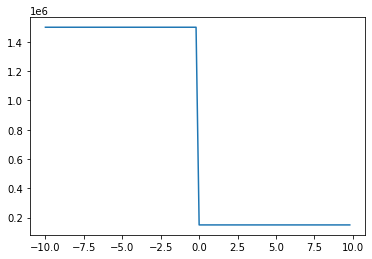

In [58]:
plt.plot(x0, w0[2, :])

In [59]:
print(w0[2, :])

[1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000.
 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000.
 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000.
 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000.
 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000.
 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000. 1500000.
 1500000. 1500000.  150000.  150000.  150000.  150000.  150000.  150000.
  150000.  150000.  150000.  150000.  150000.  150000.  150000.  150000.
  150000.  150000.  150000.  150000.  150000.  150000.  150000.  150000.
  150000.  150000.  150000.  150000.  150000.  150000.  150000.  150000.
  150000.  150000.  150000.  150000.  150000.  150000.  150000.  150000.
  150000.  150000.  150000.  150000.  150000.  150000.  150000.  150000.
  150000.  150000.  150000.  150000.]


In [60]:
def cir(w_prev, tau, A, omega, omega_inv, lam, h):
    w_next = np.zeros(w_prev.shape)
  
    for i in range(1, w_next.shape[1] - 1):
        w_next[:, i] = w_prev[:, i] - tau * np.matmul(A[:, :, i], (w_prev[:, i + 1] - w_prev[:, i - 1])) / (2 * h) + tau * np.matmul(np.matmul(omega_inv[:, :, i], np.matmul(lam[:, :, i], omega[:, :, i])), (w_prev[:, i + 1] - 2 * w_prev[:, i] + w_prev[:, i - 1])) / (2 * h)
    w_next[:, 0] = w_next[:, 1]
    w_next[:, -1] = w_next[:, -2]
    

    return w_next

In [61]:
c_from_e = lambda e: np.sqrt(gam * e * (gam - 1))

In [116]:
def solve(start, stop, step, CFL_max, time, show=True, dt_output=0.001):
    x0 = generate_grid(start, stop, step)

    v0 = np.zeros((3, len(x0)))
    w0 = np.zeros((3, len(x0)))

    el = e_from_prho(pl, rhol)
    for i in range(int(len(x0) / 2)):
        v0[:, i] = [rhol, vl, el]
        w0[:, i] = [rhol, rhol * vl, rhol * el]

    er = e_from_prho(pr, rhor)
    for i in range(int(len(x0) / 2), len(x0)):
        v0[:, i] = [rhor, vr, er]
        w0[:, i] = [rhor, rhor * vr, rhor * er]
        
    timestamps = []
    v_res = []
    w_res = []
    P = []
  
    v_res.append(v0)
    w_res.append(w0)
    timestamps.append(0)

    P0 = (gam - 1) * v0[0, :] * v0[2, :]
    P.append(P0)  

    t = 0
    next_output = t + dt_output
    n = int((stop - start) / step)
    tau = CFL_max * step

    w = w0.copy()
    v = v0.copy()
    
    print('CFL = {}'.format(CFL_max))
    omega = np.zeros((3, 3, len(x0)))
    omega_inv = np.zeros((3, 3, len(x0)))
    lam = np.zeros((3, 3, len(x0)))
    A = np.zeros((3, 3, len(x0)))
    while (t < time):
        omega[0, 0, :] = -v[1, :] * c_from_e(v[2, :])
        omega[0, 1, :] = c_from_e(v[2, :])
        omega[0, 2, :] = gam - 1
        omega[1, 0, :] = -1 * c_from_e(v[2, :])**2
        omega[1, 2, :] = gam - 1
        omega[2, 0, :] = v[1, :] * c_from_e(v[2, :])
        omega[2, 1, :] = -c_from_e(v[2, :])
        omega[2, 2, :] = gam - 1

        for i in range(len(x0)):
            omega_inv[:, :, i] = np.linalg.inv(omega[:, :, i])

        lam[0, 0, :] = abs(v[1, :]  + c_from_e(v[2, :]))
        lam[1, 1, :] = abs(v[1, :])
        lam[2, 2, :] = abs(v[1, :] - c_from_e(v[2, :]))

        A[0, 1, :] = 1
        A[1, 0, :] = -v[1, :]**2
        A[1, 1, :] = 2 * v[1, :]
        A[1, 2, :] = gam - 1
        A[2, 0, :] = -v[1, :] * v[2, :] * gam
        A[2, 1, :] = gam * v[2, :]
        A[2, 2, :] = v[1, :]

        cfl = tau * np.max(lam)/h
        if cfl > 0.01:
            tau /= 1.1 * (cfl / CFL_max)
            
#         print('tau = {}'.format(tau))
#         print('cfl = {}'.format(tau * np.max(lam)/h))

        w = cir(w, tau, A, omega, omega_inv, lam, h)
        
        v[0, :] = w[0, :]
        v[1, :] = w[1, :] / w[0, :]
        v[2, :] = w[2, :] / w[0, :]

        v[:, 0] = v[:, 1]
        v[:, -1] = v[:, -2]

        P_cur = (gam - 1) * v[0, :] * v[2, :]

        w_res.append(w.copy())
        v_res.append(v.copy())
        P.append(P_cur.copy())

        if t >= next_output:
            if show:
                figure, axis = plt.subplots(2, 2, figsize=(10, 10))
                axis[0, 0].plot(x0, v[0, :], label='t = {:.3f}'.format(t))
                axis[0, 0].set_title("Density")
                axis[0, 0].set_xlabel("x, m")
                axis[0, 0].set_ylabel(r'$\rho$, kg/m3')
                axis[0, 1].plot(x0, v[2,:]/1e3, label='t = {:.3f}'.format(t))
                axis[0, 1].set_title("Energy")
                axis[0, 1].set_xlabel("x, m")
                axis[0, 1].set_ylabel(r'e, kJ/kg')
                axis[1, 0].plot(x0, v[1,:], label='t = {:.3f}'.format(t))
                axis[1, 0].set_title("Speed")
                axis[1, 0].set_xlabel("x, m")
                axis[1, 0].set_ylabel(r'u, m/s')
                axis[1, 1].plot(x0, P_cur/1e5, label='t = {:.3f}'.format(t))
                axis[1, 1].set_title("Pressure")
                axis[1, 1].set_xlabel("x, m")
                axis[1, 1].set_ylabel(r'P, atm')
                
                plt.legend(loc='upper left')

            next_output += dt_output
        t += tau
        timestamps.append(t)
#         print('t = {}'.format(t))
#         print('\n')

    return w_res, v_res, P

CFL = 0.01


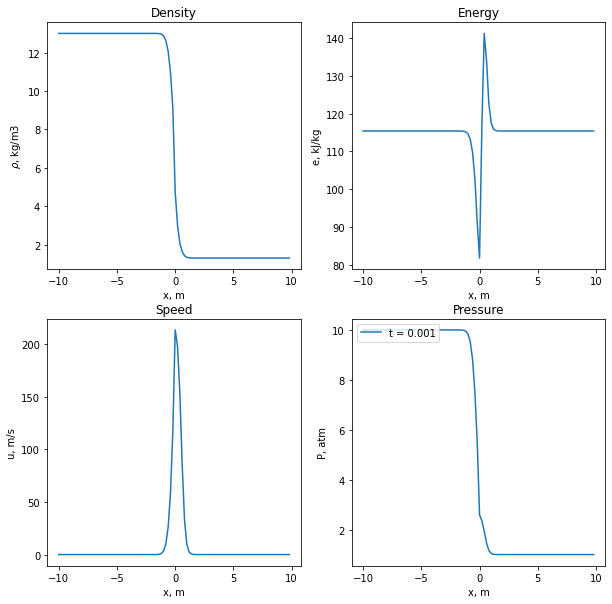

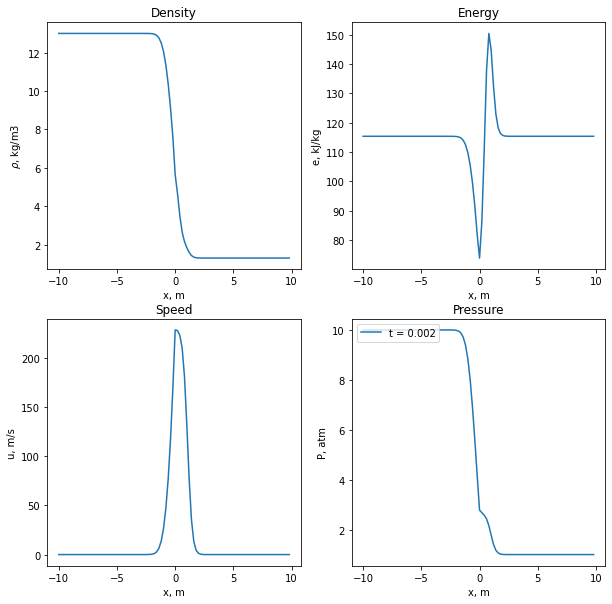

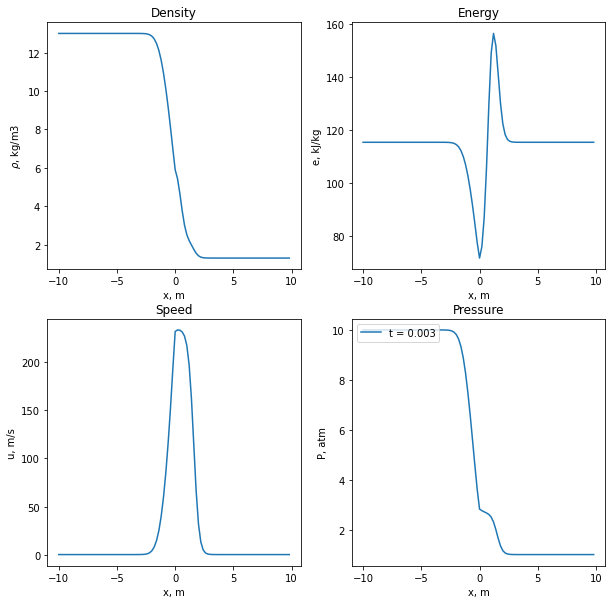

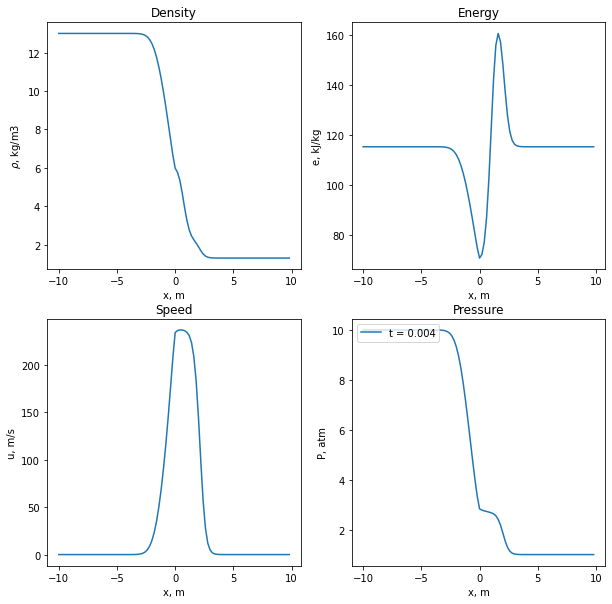

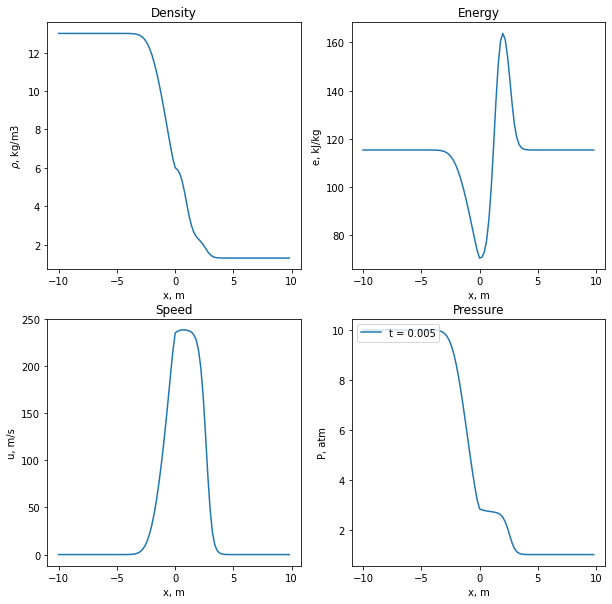

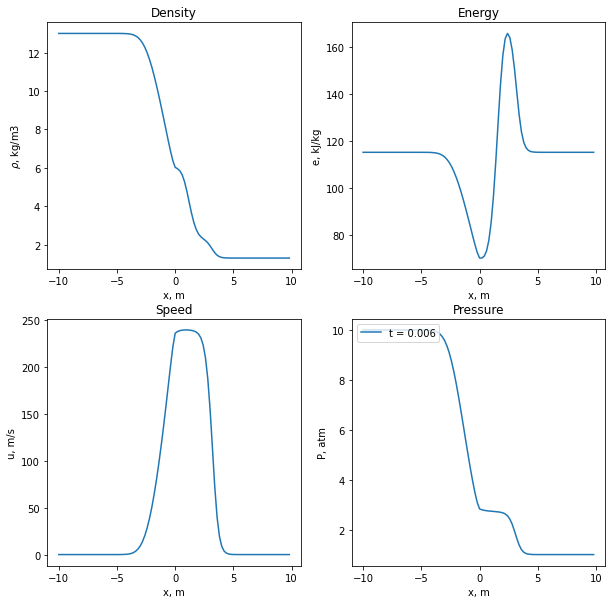

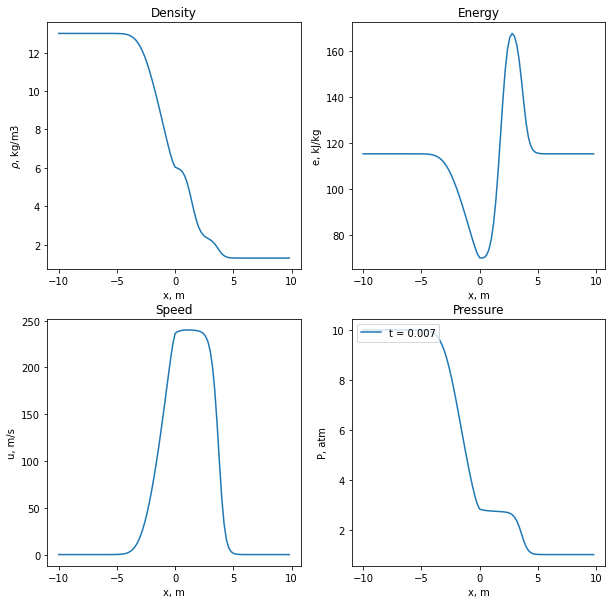

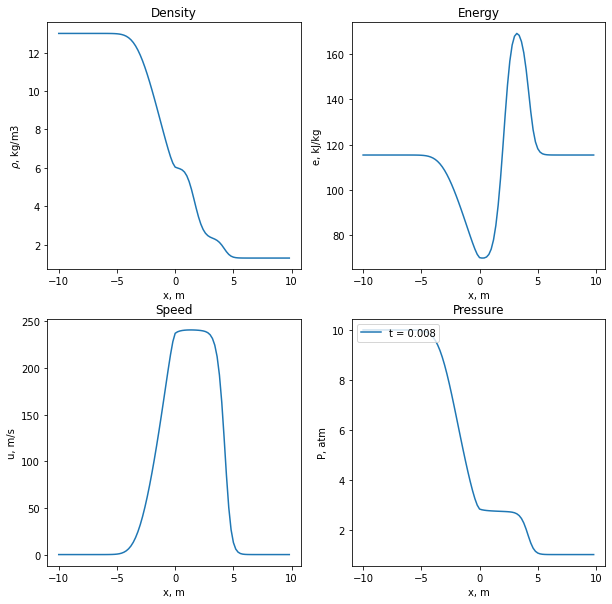

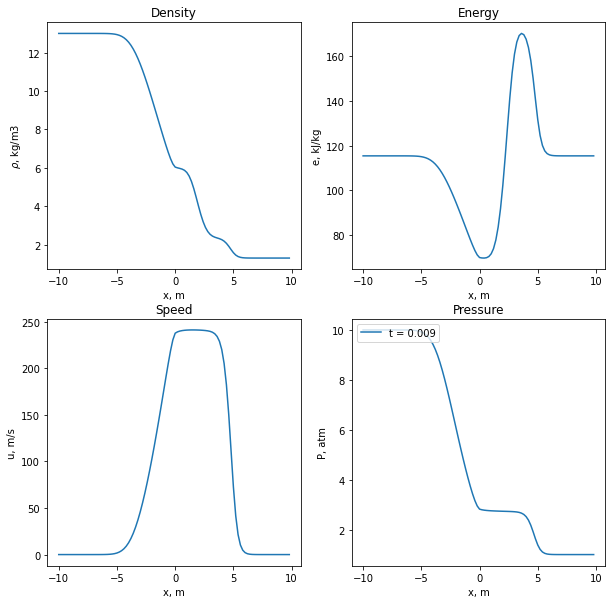

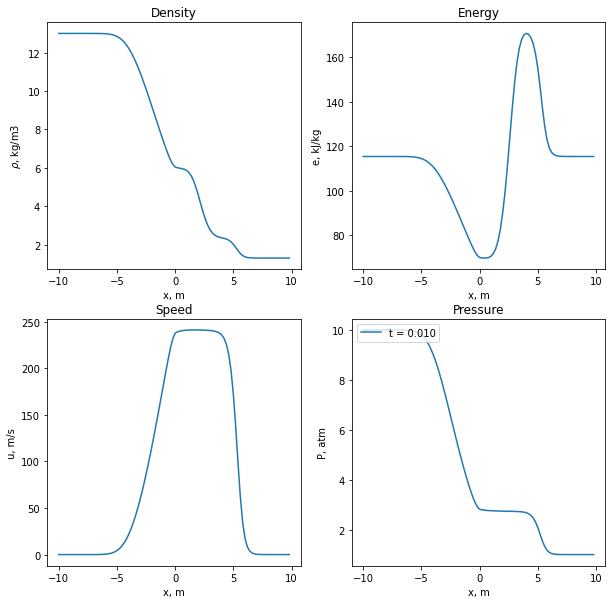

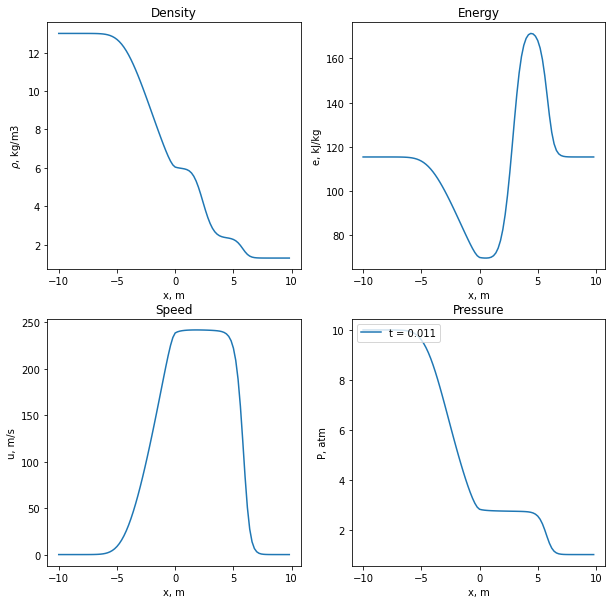

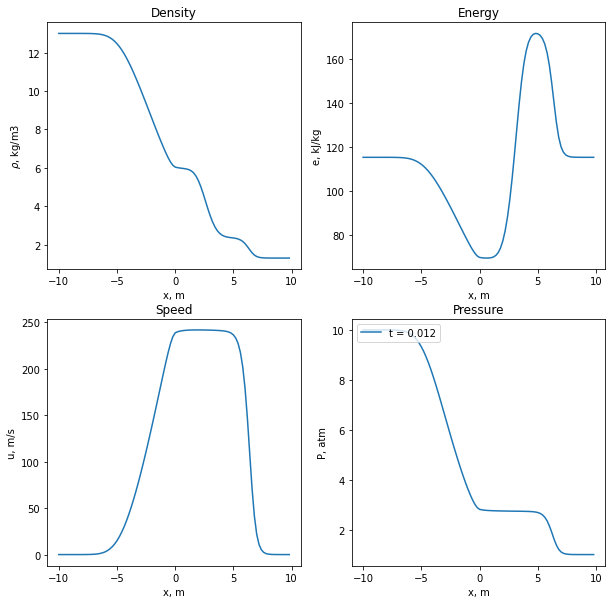

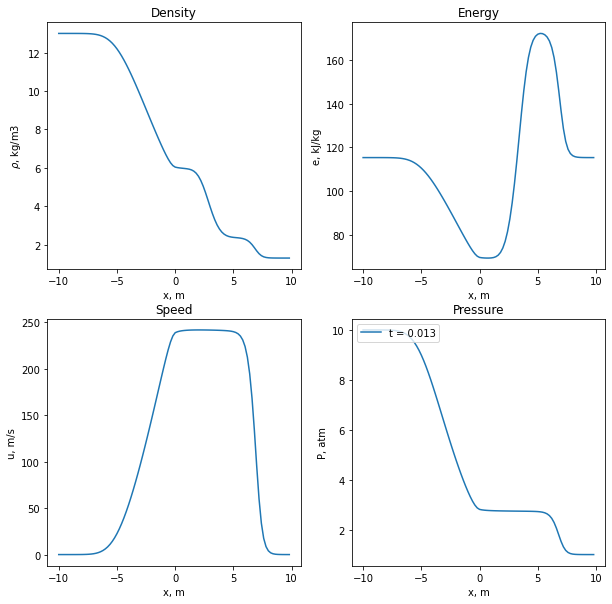

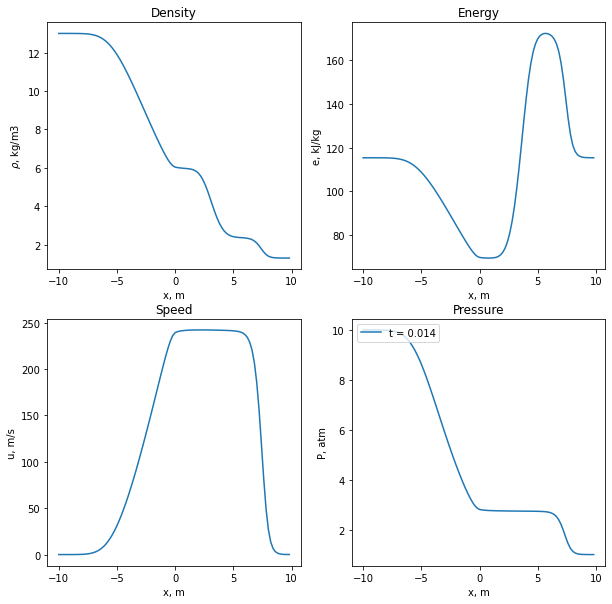

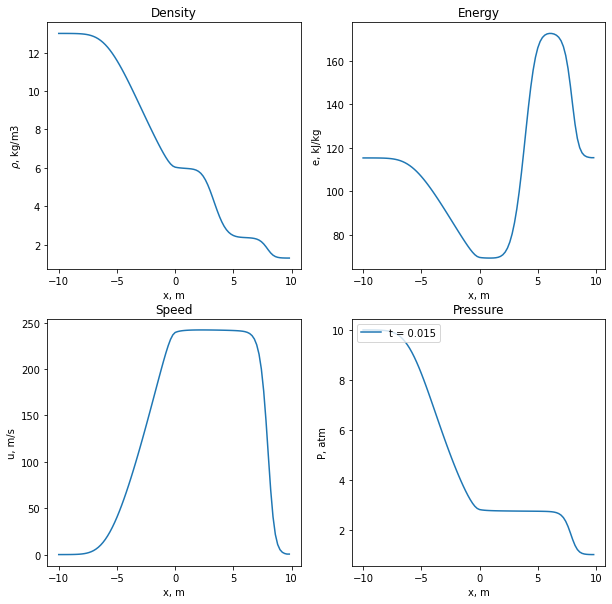

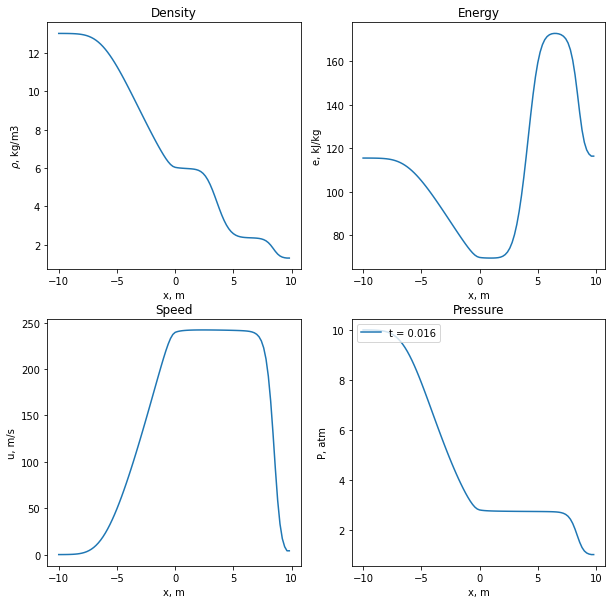

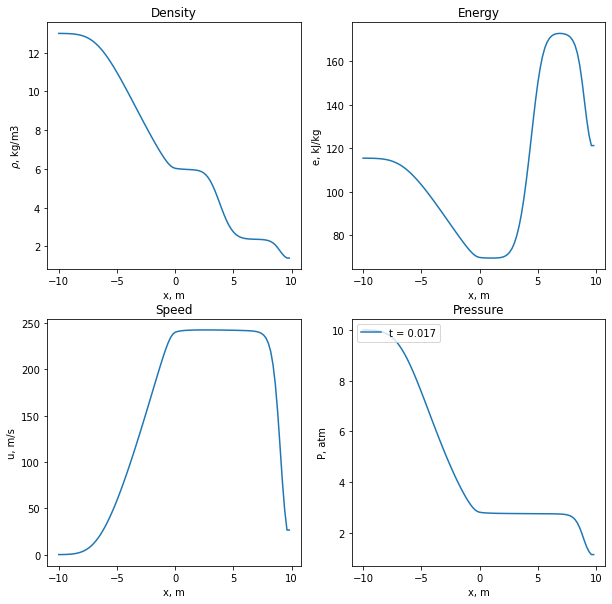

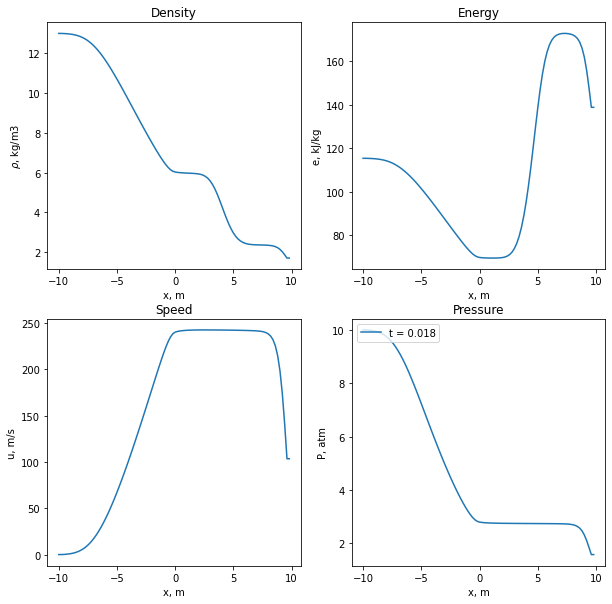

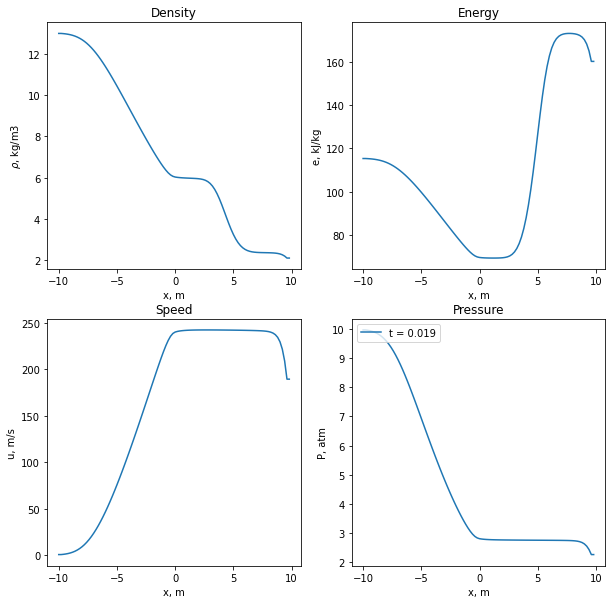

In [117]:
w, v, P = solve(-L, L, h, 0.01, time)

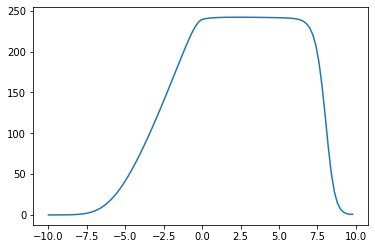

In [115]:
plt.plot(x0, v[5166][1])

In [128]:
def cir_inv(w_prev, tau, omega, omega_inv, lam, h):
    w_next = np.zeros(w_prev.shape)
  
    for i in range(1, w_next.shape[1] - 1):
        w_next[:, i] = np.matmul(omega[:, :, i], w_prev[:, i]) - tau * np.matmul((lam + abs(lam))[:, :, i], (np.matmul(omega[:, :, i], w_prev[:, i]) - np.matmul(omega[:, :, i - 1], w_prev[:, i - 1]))) / (2 * h) - tau * np.matmul((lam - abs(lam))[:, :, i], (np.matmul(omega[:, :, i + 1], w_prev[:, i + 1]) - np.matmul(omega[:, :, i], w_prev[:, i]))) / (2 * h)
        w_next[:, i] = np.matmul(omega_inv[:, :, i], w_next[:, i])
    w_next[:, 0] = w_next[:, 1]
    w_next[:, -1] = w_next[:, -2]
    

    return w_next

In [129]:
def solve_inv(start, stop, step, CFL_max, time, show=True, dt_output=0.001):
    x0 = generate_grid(start, stop, step)

    v0 = np.zeros((3, len(x0)))
    w0 = np.zeros((3, len(x0)))

    el = e_from_prho(pl, rhol)
    for i in range(int(len(x0) / 2)):
        v0[:, i] = [rhol, vl, el]
        w0[:, i] = [rhol, rhol * vl, rhol * el]

    er = e_from_prho(pr, rhor)
    for i in range(int(len(x0) / 2), len(x0)):
        v0[:, i] = [rhor, vr, er]
        w0[:, i] = [rhor, rhor * vr, rhor * er]
        
    timestamps = []
    v_res = []
    w_res = []
    P = []
  
    v_res.append(v0)
    w_res.append(w0)
    timestamps.append(0)

    P0 = (gam - 1) * v0[0, :] * v0[2, :]
    P.append(P0)  

    t = 0
    next_output = t + dt_output
    n = int((stop - start) / step)
    tau = CFL_max * step

    w = w0.copy()
    v = v0.copy()
    
    print('CFL = {}'.format(CFL_max))
    omega = np.zeros((3, 3, len(x0)))
    omega_inv = np.zeros((3, 3, len(x0)))
    lam = np.zeros((3, 3, len(x0)))
    lam_abs = np.zeros((3, 3, len(x0)))
    while (t < time):
        omega[0, 0, :] = -v[1, :] * c_from_e(v[2, :])
        omega[0, 1, :] = c_from_e(v[2, :])
        omega[0, 2, :] = gam - 1
        omega[1, 0, :] = -1 * c_from_e(v[2, :])**2
        omega[1, 2, :] = gam - 1
        omega[2, 0, :] = v[1, :] * c_from_e(v[2, :])
        omega[2, 1, :] = -c_from_e(v[2, :])
        omega[2, 2, :] = gam - 1

        for i in range(len(x0)):
            omega_inv[:, :, i] = np.linalg.inv(omega[:, :, i])

        lam[0, 0, :] = (v[1, :]  + c_from_e(v[2, :]))
        lam[1, 1, :] = (v[1, :])
        lam[2, 2, :] = (v[1, :] - c_from_e(v[2, :]))
        
        cfl = tau * np.max(abs(lam))/h
        if cfl > 0.01:
            tau /= 1.1 * (cfl / CFL_max)
            
#         print('tau = {}'.format(tau))
#         print('cfl = {}'.format(tau * np.max(lam)/h))

        w = cir_inv(w, tau, omega, omega_inv, lam, h)
        
        v[0, :] = w[0, :]
        v[1, :] = w[1, :] / w[0, :]
        v[2, :] = w[2, :] / w[0, :]

        v[:, 0] = v[:, 1]
        v[:, -1] = v[:, -2]

        P_cur = (gam - 1) * v[0, :] * v[2, :]

        w_res.append(w.copy())
        v_res.append(v.copy())
        P.append(P_cur.copy())

        if t >= next_output:
            if show:
                figure, axis = plt.subplots(2, 2, figsize=(10, 10))
                axis[0, 0].plot(x0, v[0, :], label='t = {:.3f}'.format(t))
                axis[0, 0].set_title("Density")
                axis[0, 0].set_xlabel("x, m")
                axis[0, 0].set_ylabel(r'$\rho$, kg/m3')
                axis[0, 1].plot(x0, v[2,:]/1e3, label='t = {:.3f}'.format(t))
                axis[0, 1].set_title("Energy")
                axis[0, 1].set_xlabel("x, m")
                axis[0, 1].set_ylabel(r'e, kJ/kg')
                axis[1, 0].plot(x0, v[1,:], label='t = {:.3f}'.format(t))
                axis[1, 0].set_title("Speed")
                axis[1, 0].set_xlabel("x, m")
                axis[1, 0].set_ylabel(r'u, m/s')
                axis[1, 1].plot(x0, P_cur/1e5, label='t = {:.3f}'.format(t))
                axis[1, 1].set_title("Pressure")
                axis[1, 1].set_xlabel("x, m")
                axis[1, 1].set_ylabel(r'P, atm')
                
                plt.legend(loc='upper left')

            next_output += dt_output
        t += tau
        timestamps.append(t)
#         print('t = {}'.format(t))
#         print('\n')

    return w_res, v_res, P

CFL = 0.01


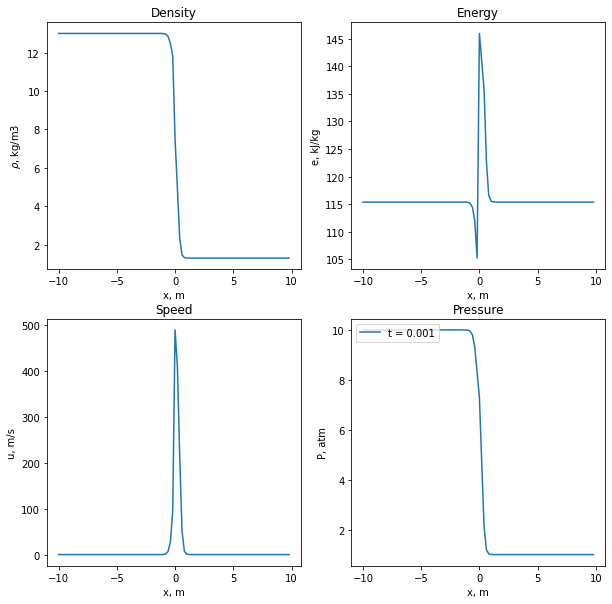

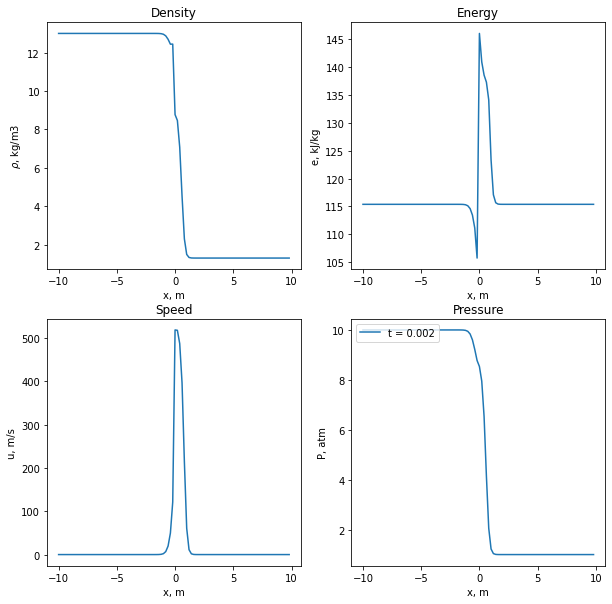

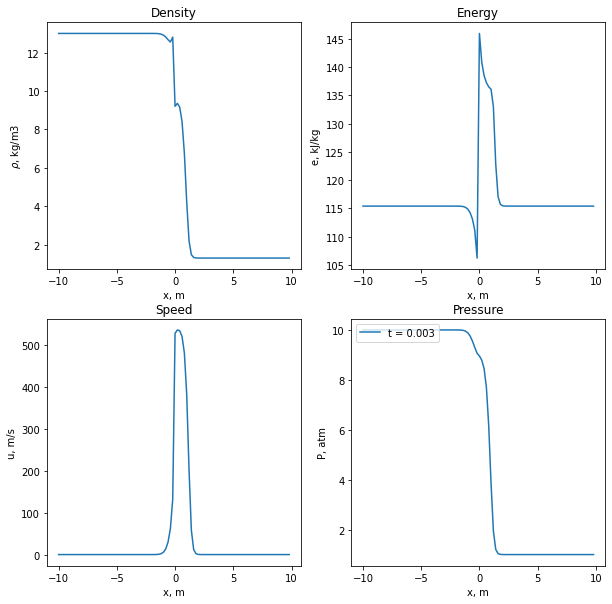

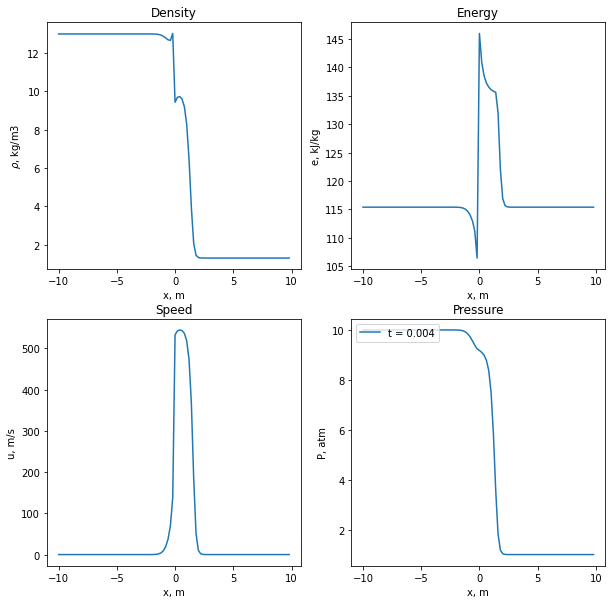

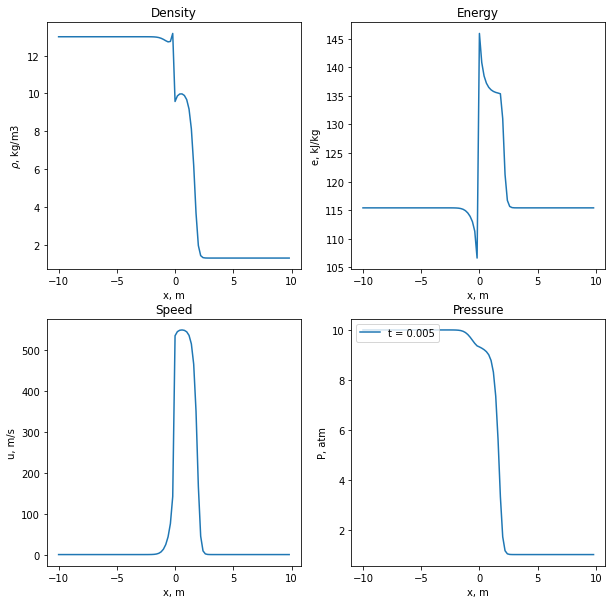

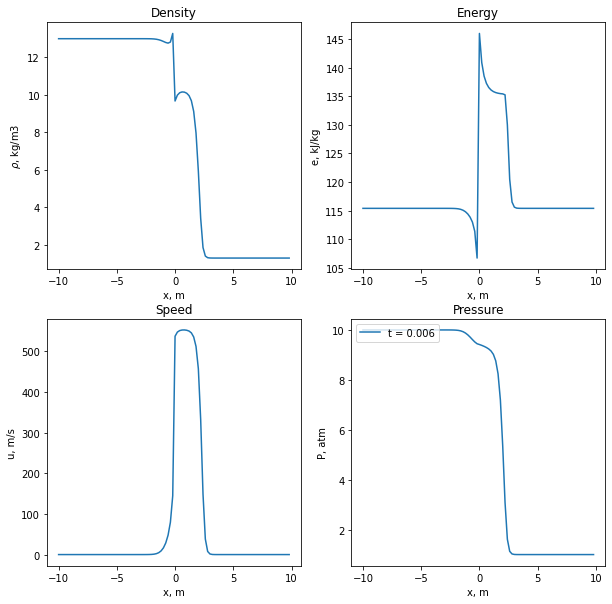

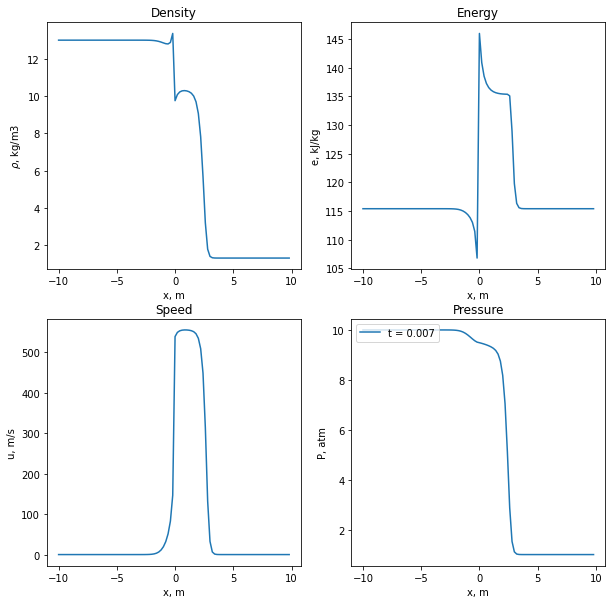

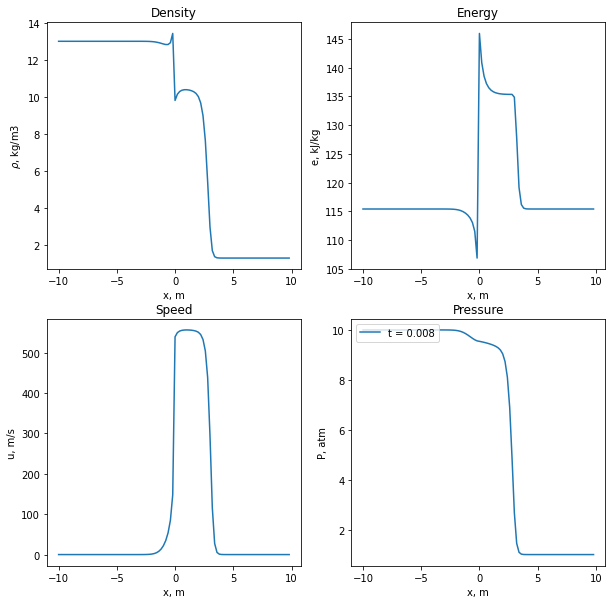

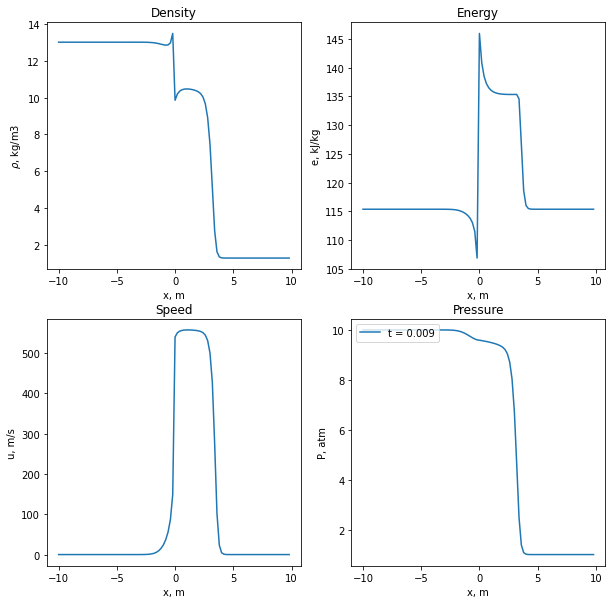

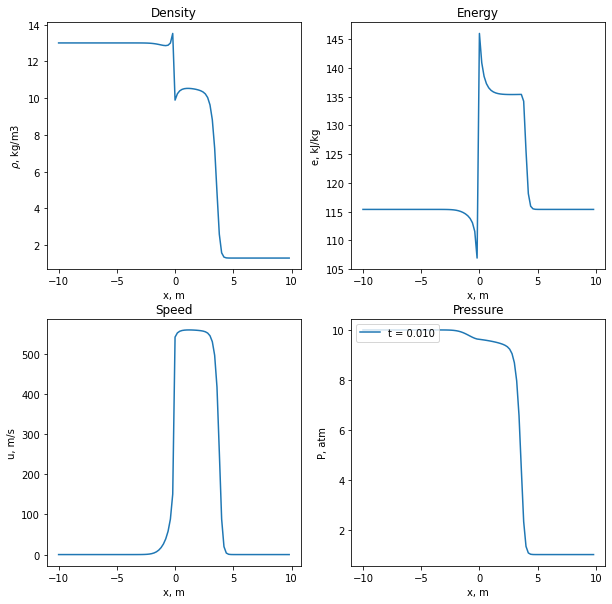

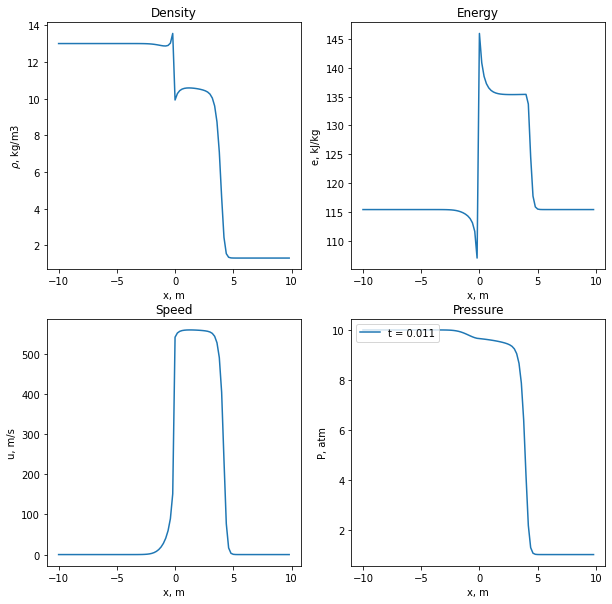

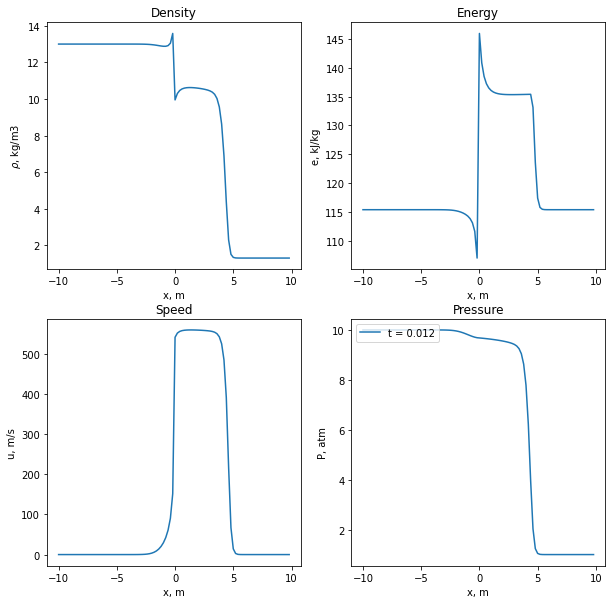

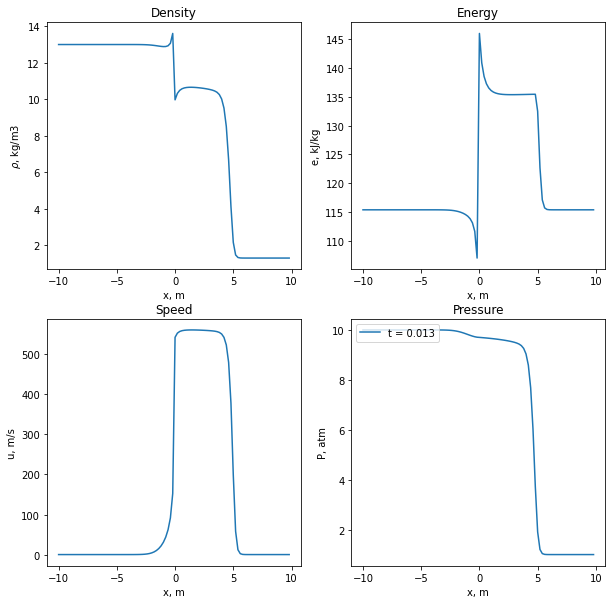

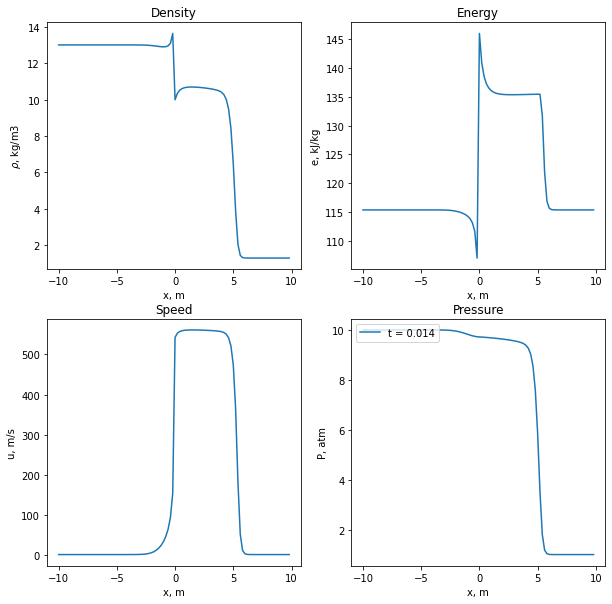

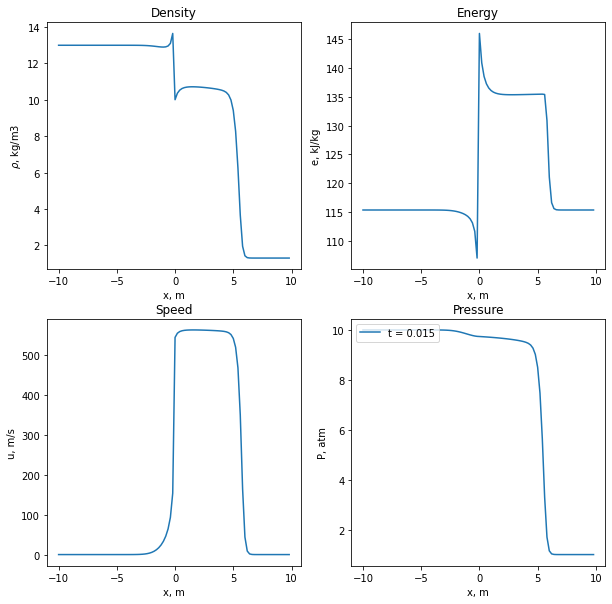

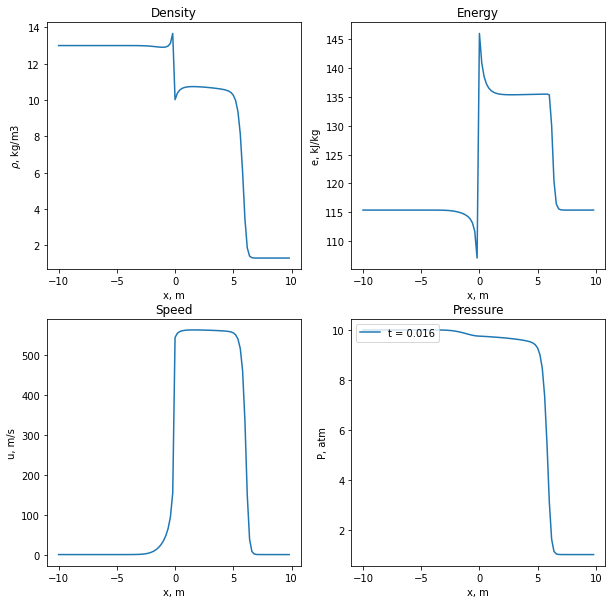

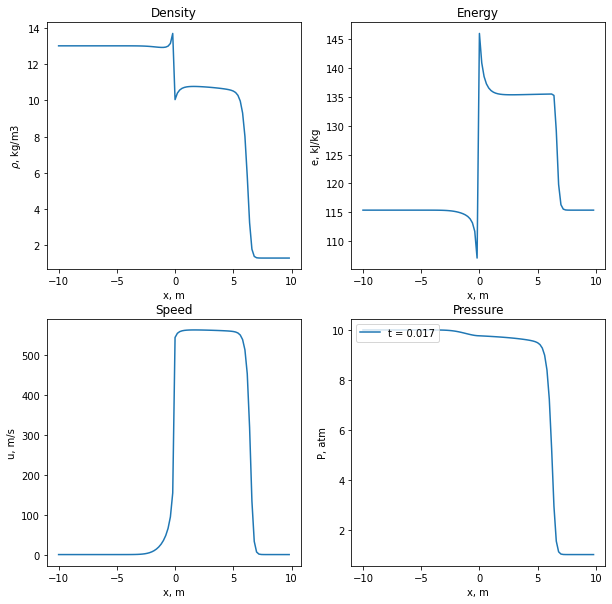

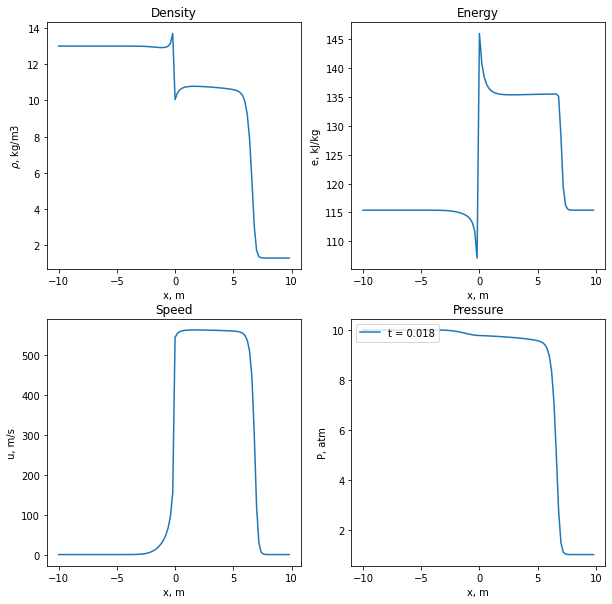

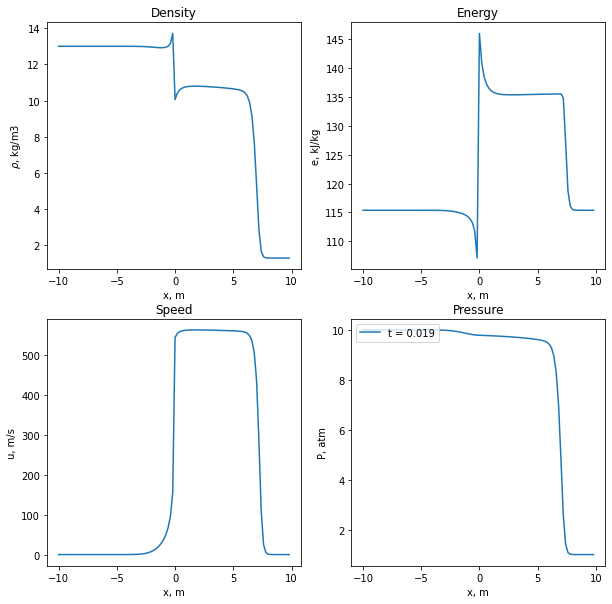

In [130]:
w_inv, v_inv, P_inv = solve_inv(-L, L, h, 0.01, time)